In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

In [2]:
temp_df = pd.read_csv('avg_temp_1880_2021.csv',parse_dates=['Date'])
temp_df.set_index('Date',inplace=True)

temp_df.head()

,AvgTemp
Date,
1880-01-01,8.056
1880-01-02,9.431
1880-01-03,8.956
1880-01-04,9.870
1880-01-05,9.213


Visualize.

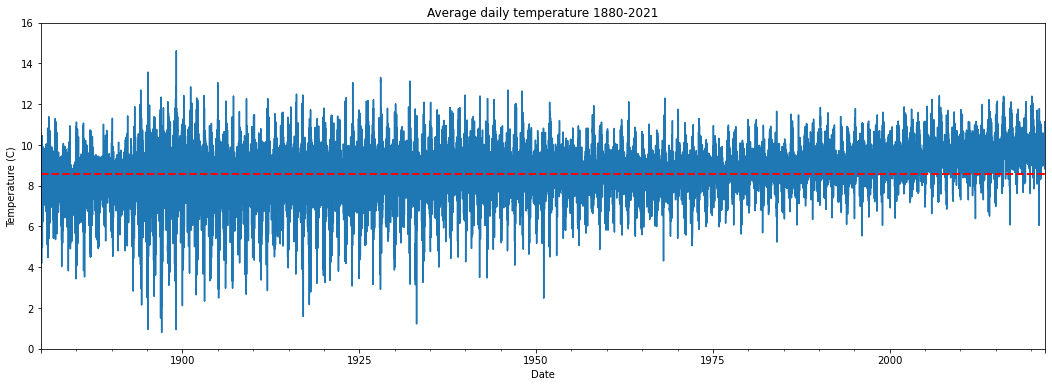

In [3]:
f,ax = plt.subplots(figsize=(18,6))

temp_df['AvgTemp'].plot(ax = ax)
ax.set_ylim((0,16))
ax.set_ylabel('Temperature (C)')
ax.set_title('Average daily temperature 1880-2021')
ax.axhline(8.59,c='r',ls='--',lw=2)

Is there a trend there? Hard to say with such high-resolution and long-term data.

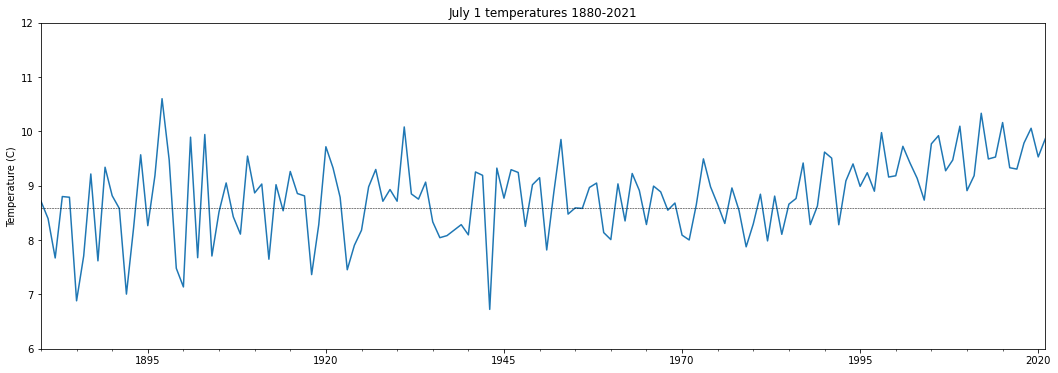

In [4]:
# Make a range of July 1 start dates
july_firsts = pd.date_range(
    start = '1880-07-01',
    end = '2021-07-01',
    freq=pd.DateOffset(years=1)
)

# Re-index
july_first_temps = temp_df.loc[july_firsts]

# Visualize
f,ax = plt.subplots(figsize=(18,6))
july_first_temps['AvgTemp'].plot(ax = ax)
ax.set_ylim((6,12))
ax.set_ylabel('Temperature (C)')
ax.set_title('July 1 temperatures 1880-2021')
ax.axhline(8.59,c='k',ls='--',lw=.5)

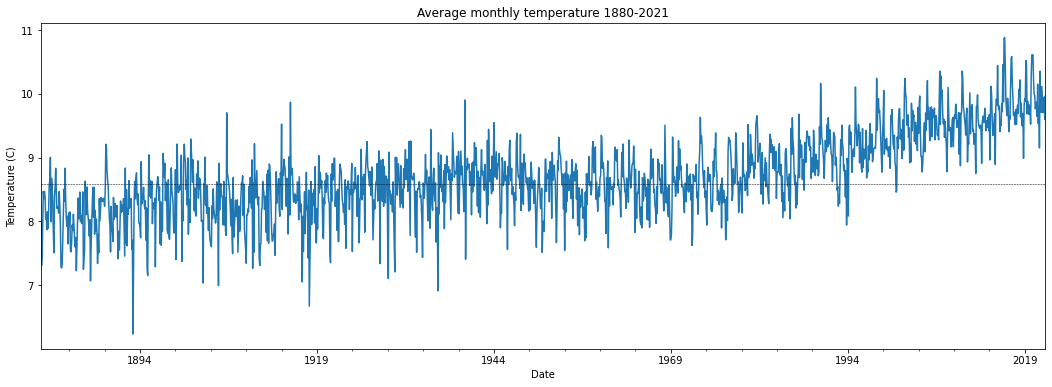

In [5]:
monthly_avg_temps = temp_df.groupby(pd.Grouper(freq='M')).agg({'AvgTemp':'mean'})

f,ax = plt.subplots(figsize=(18,6))
monthly_avg_temps['AvgTemp'].plot(ax = ax)
ax.set_ylabel('Temperature (C)')
ax.set_title('Average monthly temperature 1880-2021')
ax.axhline(8.59,c='k',ls='--',lw=.5)

Try again for annual average temperatures.

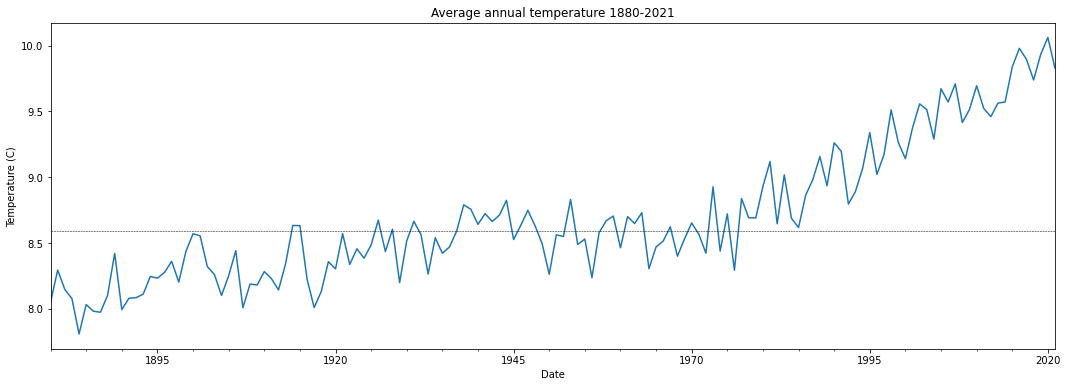

In [6]:
annual_avg_temps = temp_df.groupby(pd.Grouper(freq='Y')).agg({'AvgTemp':'mean'})

f,ax = plt.subplots(figsize=(18,6))
annual_avg_temps['AvgTemp'].plot(ax = ax)
ax.set_ylabel('Temperature (C)')
ax.set_title('Average annual temperature 1880-2021')
ax.axhline(8.59,c='k',ls='--',lw=.5)

In [7]:
quarterly_rollmean = temp_df['AvgTemp'].rolling(90).mean()
annual_rollmean = temp_df['AvgTemp'].rolling(365).mean()
decadal_rollmean = temp_df['AvgTemp'].rolling(3650).mean()

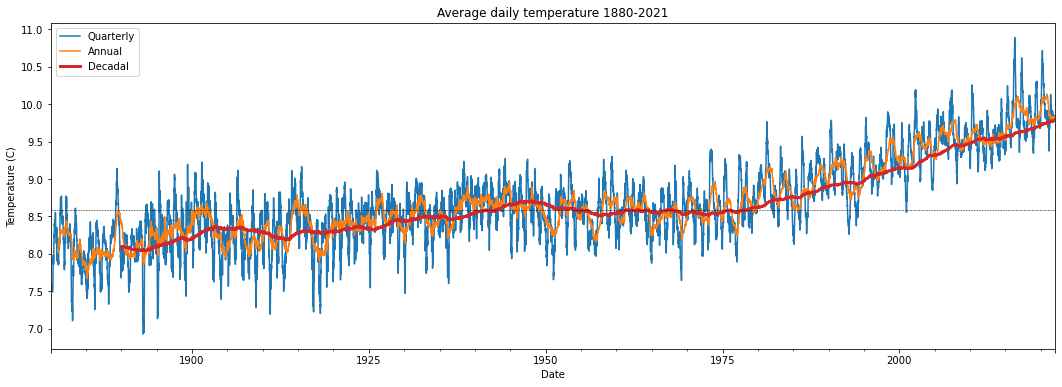

In [8]:
f,ax = plt.subplots(figsize=(18,6))

quarterly_rollmean.plot(ax = ax,color='tab:blue', label = 'Quarterly')
annual_rollmean.plot(ax = ax,color='tab:orange', label = 'Annual')
decadal_rollmean.plot(ax = ax,color='tab:red',lw=3, label = 'Decadal')

ax.set_ylabel('Temperature (C)')
ax.set_title('Average daily temperature 1880-2021')
ax.legend(loc = 'upper left')
ax.axhline(8.59,c='k',ls='--',lw=.5)

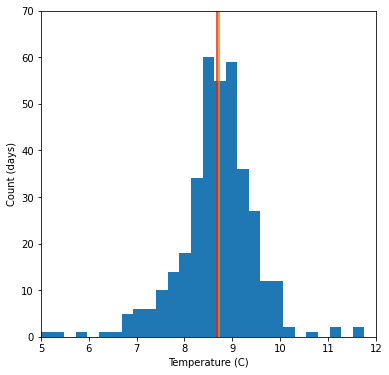

In [9]:
temps_1984 = temp_df.loc['1984','AvgTemp']

f,ax = plt.subplots(figsize=(6,6))

temps_1984.hist(bins=np.linspace(5,12,30),ax=ax,grid=False)
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Count (days)')
ax.set_xlim((5,12))
ax.set_ylim((0,70))

# Average in red
ax.axvline(temps_1984.mean(),color='tab:red')

# Median in orange
ax.axvline(temps_1984.median(),color='tab:orange')

(5.0, 12.0)

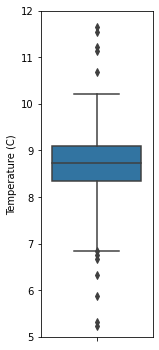

In [10]:
f,ax = plt.subplots(figsize=(2,6))

sb.boxplot(y=temps_1984,ax=ax,color='tab:blue',whis=2)
ax.set_ylabel('Temperature (C)')
ax.set_ylim((5,12))

Now we can use `catplot` to make a box plots for each year's temperature. I "zoomed" into the data since 1984 to make it easier to see.

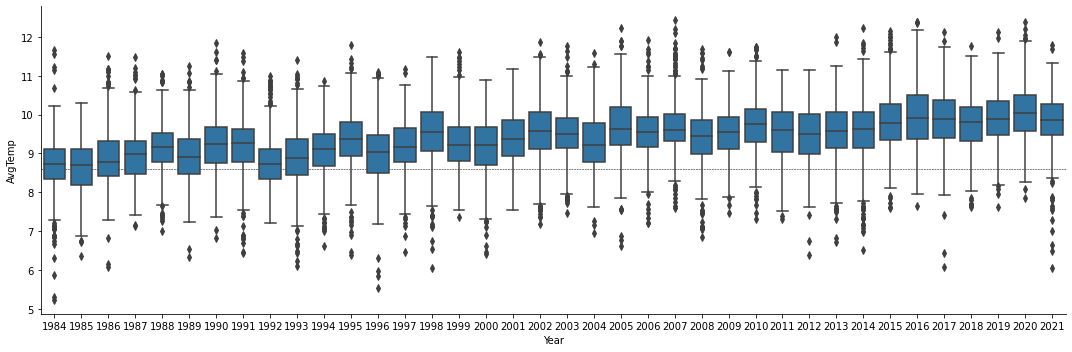

In [11]:
# Add a new column with the year 
temp_df['Year'] = temp_df.index.year

# Filter to dates since 1984
temps_1984 = temp_df.loc['1984':,:]

# Maket the plot
g = sb.catplot(
    data=temps_1984,
    x='Year',
    y='AvgTemp',
    kind='box',
    color='tab:blue',
    aspect=3
)

ax = g.axes.flat[0]
ax.axhline(8.59,c='k',ls='--',lw=.5,zorder=0)

### Load data

#### BEST temperature

In [12]:
temp_df['weekday'] = temp_df.index.weekday
temp_df['day'] = temp_df.index.day
temp_df['month'] = temp_df.index.month

#### NYC

In [13]:
nyc_df = pd.read_csv('nyc_pickups.csv',parse_dates=['timestamp'])

nyc_df.set_index('timestamp',inplace=True)

nyc_df.head()

,yellowcab,rideshare
timestamp,,
2020-03-01 00:00:00,215,41.0
2020-03-01 00:01:00,201,28.0
2020-03-01 00:02:00,213,33.0
2020-03-01 00:03:00,199,27.0
2020-03-01 00:04:00,211,36.0


In [14]:
nyc_df['min'] = nyc_df.index.minute
nyc_df['hour'] = nyc_df.index.hour
nyc_df['weekday'] = nyc_df.index.weekday

#### S&P 500

In [15]:
sp500_df = pd.read_csv('../Week 09 - Time Series/sp500.csv',parse_dates=['Date'])

sp500_df.set_index('Date',inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../Week 09 - Time Series/sp500.csv'

In [ ]:
sp500_df['weekday'] = sp500_df.index.weekday
sp500_df['day'] = sp500_df.index.day
sp500_df['month'] = sp500_df.index.month

sp500_df.head()

#### Wikipedia

In [ ]:
pageviews_df = pd.read_csv('pageviews_ucb.csv',parse_dates=['timestamp'])

pageviews_df.set_index('timestamp',inplace=True)

In [16]:
pageviews_df['weekday'] = pageviews_df.index.weekday
pageviews_df['day'] = pageviews_df.index.day
pageviews_df['month'] = pageviews_df.index.month

pageviews_df.head()

NameError: name 'pageviews_df' is not defined

#### Airline traffic

In [17]:
passengers_df = pd.read_csv('../Week 04 - Tidying/passengers.csv',parse_dates=['Month'])

passengers_df.set_index('Month',inplace=True)

passengers_df['month'] = passengers_df.index.month

passengers_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Week 04 - Tidying/passengers.csv'

### Hourly patterns

<AxesSubplot:xlabel='min'>

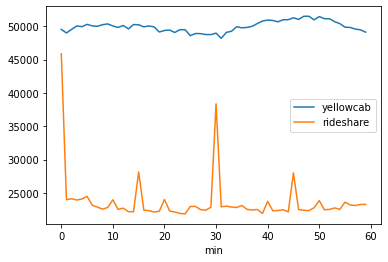

In [20]:
nyc_df.groupby('min').agg({'yellowcab':'sum','rideshare':'sum'}).plot()

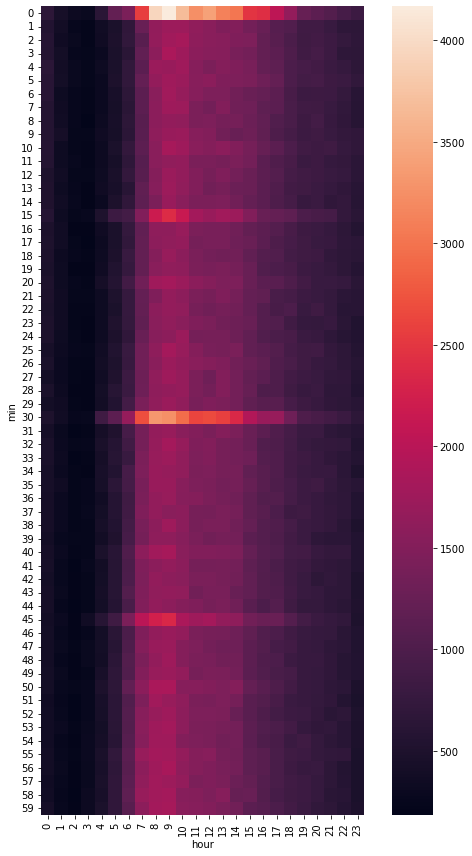

In [21]:
rideshare_pivot = pd.pivot_table(
    nyc_df,
    index='min',
    columns='hour',
    values='rideshare',
    aggfunc='sum'
)

f,ax = plt.subplots(figsize=(8,12))

sb.heatmap(
    rideshare_pivot,
    ax=ax,
    square=True
)

f.tight_layout()

### Daily patterns: Circadian rhythms

Most people in a given location sleep around the same time. When people are asleep, nothing much happens and this should be apparent in the data.

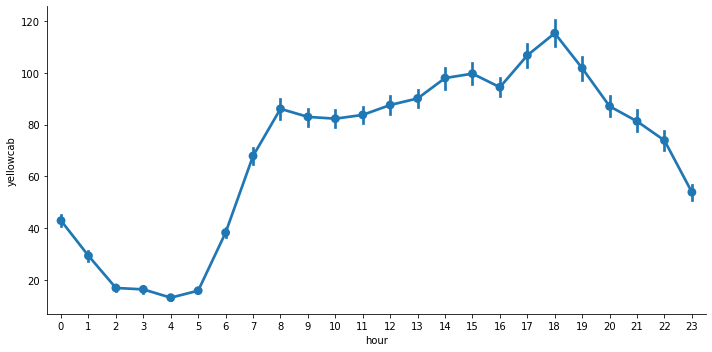

In [22]:
sb.catplot(
    x='hour',
    y='yellowcab',
    data=nyc_df,
    kind='point',
    aspect = 2
)

### Weekly patterns: Workdays and weekends

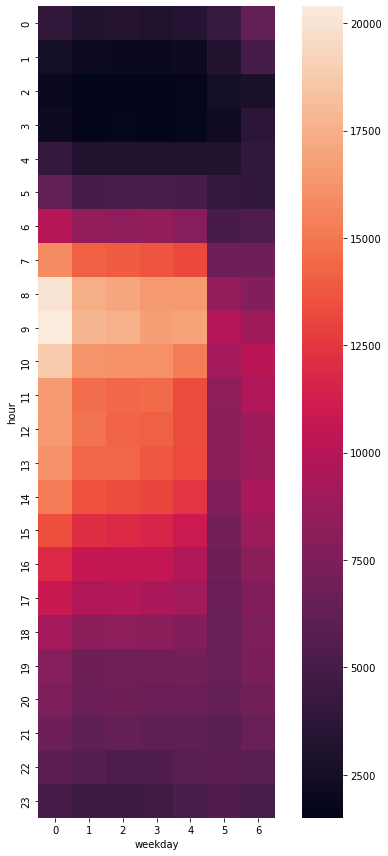

In [23]:
rideshare_pivot = pd.pivot_table(
    nyc_df,
    index='hour',
    columns='weekday',
    values='rideshare',
    aggfunc='sum'
)

f,ax = plt.subplots(figsize=(8,12))

sb.heatmap(
    rideshare_pivot,
    ax=ax,
    square=True
)

f.tight_layout()

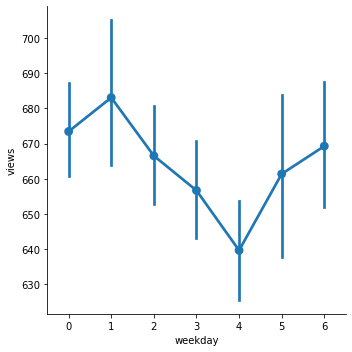

In [24]:
sb.catplot(x='weekday',y='views',data=pageviews_df,kind='point')

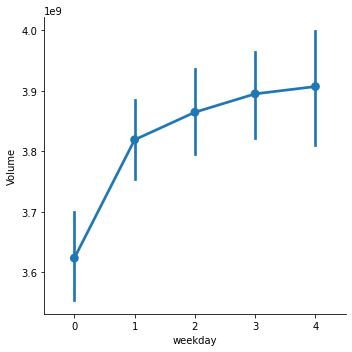

In [25]:
sb.catplot(x='weekday',y='Volume',data=sp500_df,kind='point')

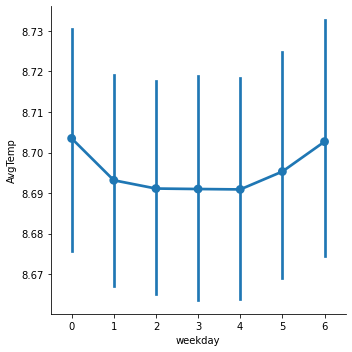

In [26]:
sb.catplot(x='weekday',y='AvgTemp',data=temp_df,kind='point')

### Monthly patterns: Sometimes, but not in our data

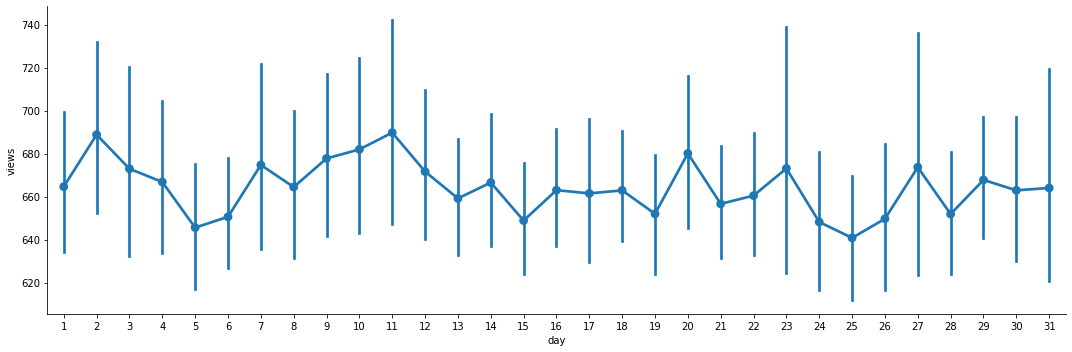

In [27]:
sb.catplot(x='day',y='views',data=pageviews_df,kind='point',aspect=3)

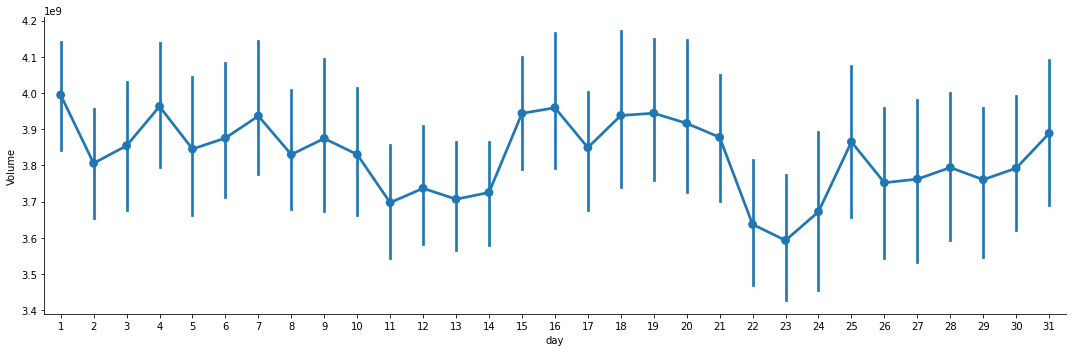

In [28]:
sb.catplot(x='day',y='Volume',data=sp500_df,kind='point',aspect=3)

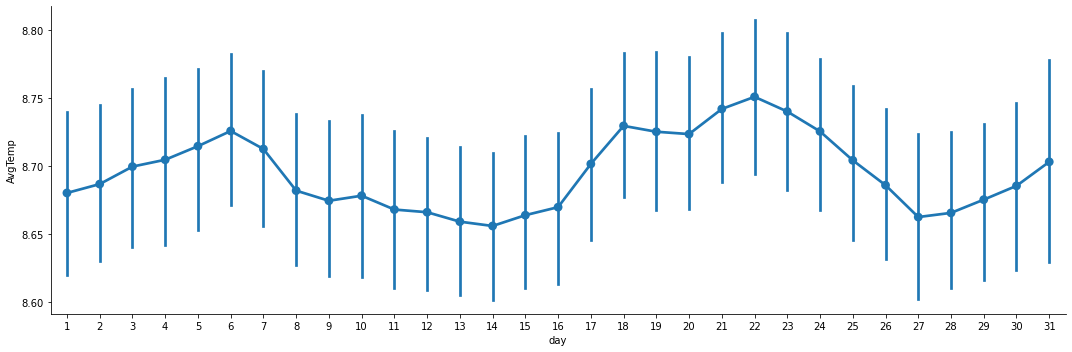

In [29]:
sb.catplot(x='day',y='AvgTemp',data=temp_df,kind='point',aspect=3)

### Annual patterns: Seasonality

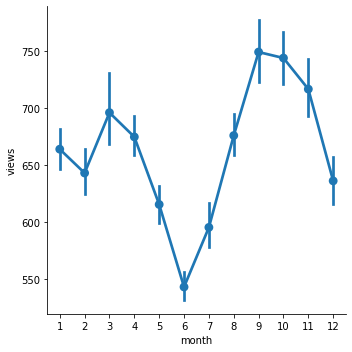

In [30]:
sb.catplot(x='month',y='views',data=pageviews_df,kind='point',nboot=10000)

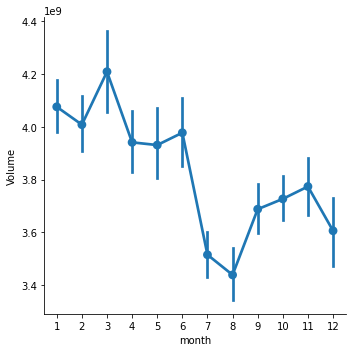

In [31]:
sb.catplot(x='month',y='Volume',data=sp500_df,kind='point')

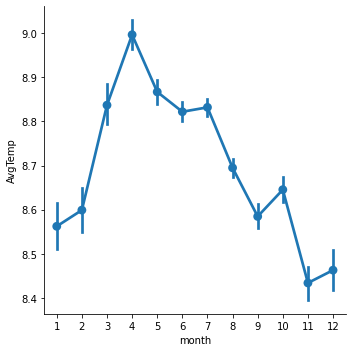

In [32]:
sb.catplot(x='month',y='AvgTemp',data=temp_df,kind='point')

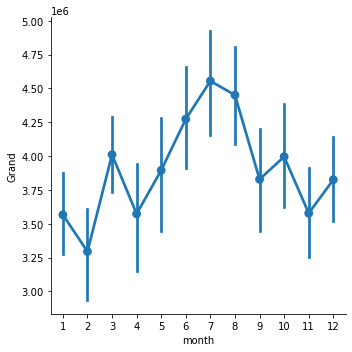

In [33]:
sb.catplot(x='month',y='Grand',data=passengers_df,kind='point')

## Decomposing time series

In [34]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

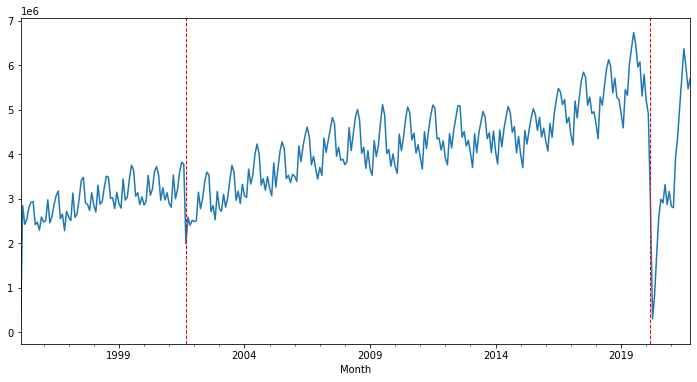

In [35]:
f,ax = plt.subplots(figsize=(12,6))

passengers_df['Grand'].plot(ax=ax)

ax.axvline(pd.Timestamp('2001-09-11'),color='r',ls='--',lw=1)
ax.axvline(pd.Timestamp('2020-03-11'),color='r',ls='--',lw=1)

There is a strong annual pattern (at least, more on other signals hiding in the data below) in this data. If we wanted to erase this annual signal, we could use `.rolling(12).mean()` average the values across 12 months out together.

Text(0, 0.5, 'Total passengers')

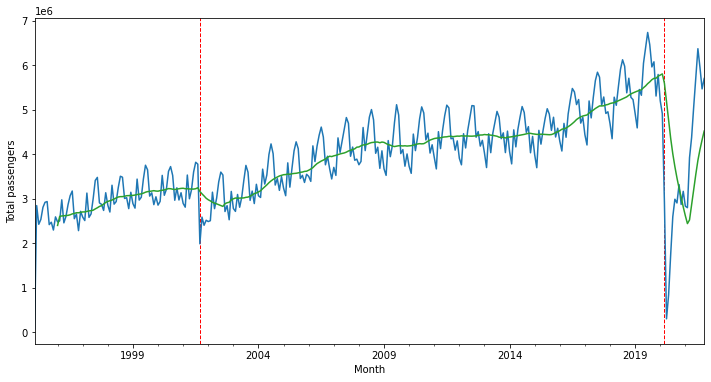

In [36]:
f,ax = plt.subplots(figsize=(12,6))

passengers_df['Grand'].plot(ax=ax)
passengers_df['Grand'].rolling(12).mean().plot(ax=ax,c='tab:green')

ax.axvline(pd.Timestamp('2001-09-11'),color='r',ls='--',lw=1,zorder=0)
ax.axvline(pd.Timestamp('2020-03-11'),color='r',ls='--',lw=1,zorder=0)

ax.set_ylabel('Total passengers')

### Linear model

In [37]:
passengers_df['months_since_opening'] = (passengers_df.index - pd.Timestamp('1995-01-01'))/pd.Timedelta(30,'D')
passengers_df.head()

,American,Cargo,Delta,Frontier,Other,Southwest,United,United Express,Grand,month,months_since_opening
Month,,,,,,,,,,,
1995-02-01,5833,0,4805,1434,8625,NaN,47230,2635,70562,2,1.033333
1995-03-01,228196,0,200964,36703,245171,NaN,1962445,169190,2842669,3,1.966667
1995-04-01,184229,0,157853,40050,191393,NaN,1724836,124351,2422712,4,3.000000
1995-05-01,187990,0,162622,41403,171425,NaN,1833305,135800,2532545,5,4.000000
1995-06-01,229348,0,198499,43754,186030,NaN,1975754,170033,2803418,6,5.033333


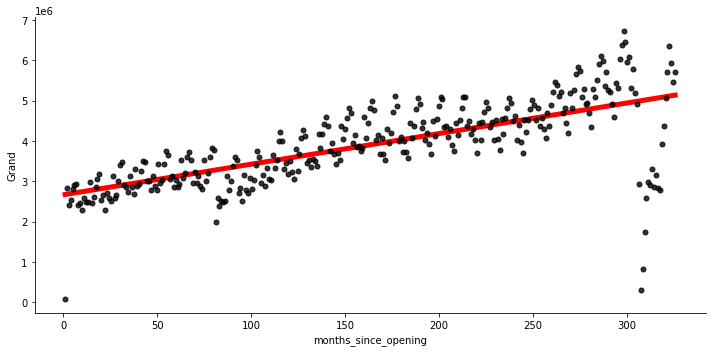

In [38]:
g = sb.lmplot(
    x='months_since_opening',
    y='Grand',
    data=passengers_df,
    aspect=2,
    ci=0,
    scatter_kws={'color':'k','s':25},
    line_kws={'lw':5,'color':'r','zorder':0}
)

### De-periodized data

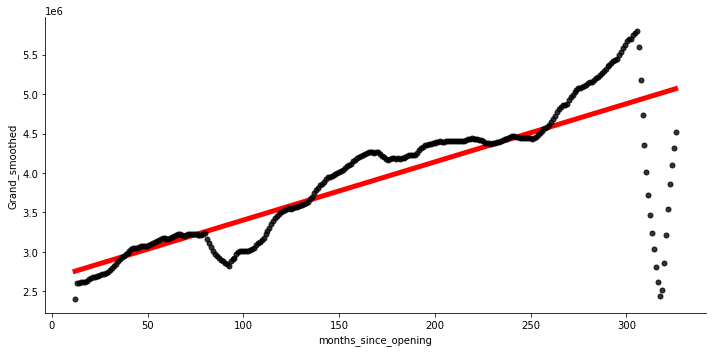

In [39]:
passengers_df['Grand_smoothed'] = passengers_df['Grand'].rolling(12).mean()

g = sb.lmplot(
    x='months_since_opening',
    y='Grand_smoothed',
    data=passengers_df,
    aspect=2,
    ci=0,
    scatter_kws={'color':'k','s':25},
    line_kws={'lw':5,'color':'r','zorder':0}
)

### Additive models

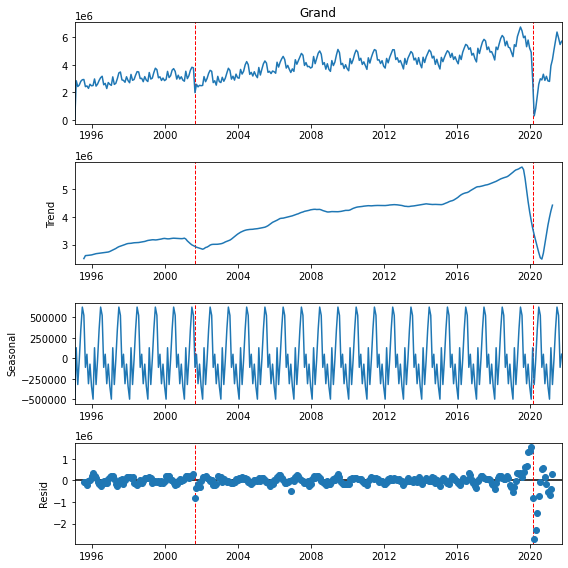

In [40]:
decomposition = sm.tsa.seasonal_decompose(passengers_df['Grand'],model='additive')

plt.rcParams["figure.figsize"] = (8,8)
f = decomposition.plot()

for _ax in f.axes:
    _ax.axvline(pd.Timestamp('2001-09-11'),color='r',ls='--',lw=1,zorder=0)
    _ax.axvline(pd.Timestamp('2020-03-11'),color='r',ls='--',lw=1,zorder=0)

### Autocorrelation

Text(0, 0.5, 'Passenger volume in month t+1')

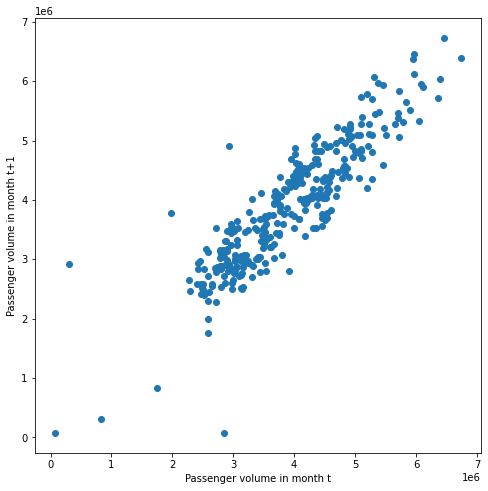

In [41]:
f,ax = plt.subplots(figsize=(8,8))

x = passengers_df['Grand']
y = passengers_df['Grand'].shift(1).fillna(method='bfill')

ax.scatter(x,y)
ax.set_xlabel('Passenger volume in month t')
ax.set_ylabel('Passenger volume in month t+1')

In [42]:
np.corrcoef(passengers_df['Grand'],passengers_df['Grand'].shift(1).fillna(method='bfill'))[0,1]

0.89460771408251

In [43]:
np.corrcoef(passengers_df['Grand'],passengers_df['Grand'].shift(2).fillna(method='bfill'))[0,1]

0.8162779695804339

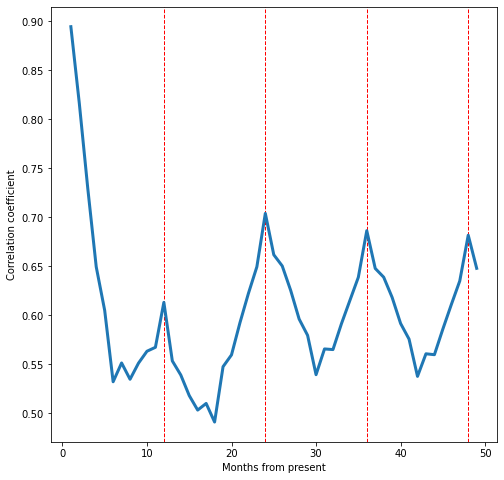

In [44]:
corr_shift_d = {}

for _shift in range (1,50):
    corr_shift_d[_shift] = np.corrcoef(passengers_df['Grand'],passengers_df['Grand'].shift(_shift).fillna(method='bfill'))[0,1]

ax = pd.Series(corr_shift_d).plot(lw=3)
ax.set_ylabel('Correlation coefficient')
ax.set_xlabel('Months from present')

for t in [12,24,36,48]:
    ax.axvline(t,c='r',zorder=0,lw=1,ls='--')

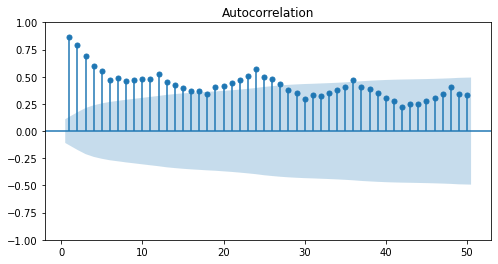

In [45]:
f,ax = plt.subplots(figsize=(8,4))

fig1 = sm.graphics.tsa.plot_acf(passengers_df['Grand'],zero=False,lags=50,ax=ax,alpha=.05)

## Forecasting

[Prophet](https://facebook.github.io/prophet/) is a time series forecasting tool developed (and obviously used by) data scientists at Facebook. There are a variety of more advanced statistical methods for modelling time series ([ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model), [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average), SARIMA, *etc*.) but these often involve doing computation-intensive [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization) to find appropriate parameters or having deep understanding of the data or a theory to translate into parameters. Forecasting methods like ARMA, ARIMA, *etc*. are outside the scope of the class.

The reason we're looking at Prophet is because it does all of these (and more!), *mostly* automatically. Definitely check out the [documentation](https://facebook.github.io/prophet/) and examples in both R and Python.

I've adapted the [Getting Started](https://facebook.github.io/prophet/docs/quick_start.html#python-api) documentation for our purposes here. Prophet wants a simple DataFrame containing only a column "ds" with timestamps and a column "y" with values for that date.

**AT THE TERMINAL WINDOW**, run this command and agree to update when it requests:

`conda install -c conda-forge prophet`

In [48]:
# Import the Prophet model object
from prophet import Prophet

### Forecasting airline passenger traffic
Prophet wants a simple DataFrame with two columns labeled specifically: "ds" contains the timestamps and "y" contains the values.

In [49]:
# Pull out one column and copy from the parent DataFrame so we can change it
passengers_prophet_df = passengers_df['Grand'].copy()

# Reset index to get the timestamps in index into a column
passengers_prophet_df = passengers_prophet_df.reset_index()

# Rename the columns to ds and y
passengers_prophet_df.columns = ['ds','y']

# Inspect
passengers_prophet_df.head()

,ds,y
0,1995-02-01,70562
1,1995-03-01,2842669
2,1995-04-01,2422712
3,1995-05-01,2532545
4,1995-06-01,2803418


In [50]:
# Make an empty passenger_model
passenger_model = Prophet(changepoints=[pd.Timestamp('2001-09-01'),pd.Timestamp('2020-03-01')])

# Fit the empty model with the observed data
passenger_model.fit(passengers_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.5809
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       594.835    0.00430528       78.3758    3.54e-05       0.001       58  LS failed, Hessian reset 
      26       595.355    0.00115305       23.0501   3.607e-05       0.001       98  LS failed, Hessian reset 
      42       595.502   7.50503e-05       15.0356   8.703e-10       0.001      194  LS failed, Hessian reset 
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made



Initial log joint probability = -370.668
Iteration  1. Log joint probability =    258.433. Improved by 629.101.
Iteration  2. Log joint probability =    468.405. Improved by 209.972.
Iteration  3. Log joint probability =    582.716. Improved by 114.311.
Iteration  4. Log joint probability =    593.417. Improved by 10.7016.
Iteration  5. Log joint probability =    594.471. Improved by 1.05327.
Iteration  6. Log joint probability =     594.53. Improved by 0.0593855.
Iteration  7. Log joint probability =    594.625. Improved by 0.0947431.
Iteration  8. Log joint probability =    595.601. Improved by 0.975794.
Iteration  9. Log joint probability =    595.609. Improved by 0.00814366.
Iteration 10. Log joint probability =    595.609. Improved by 0.000295259.
Iteration 11. Log joint probability =    595.609. Improved by 0.0002116.
Iteration 12. Log joint probability =     595.61. Improved by 0.000917414.
Iteration 13. Log joint probability =     595.61. Improved by 0.00012652.
Iteration 14. 

Make a DataFrame extending into the future.

In [51]:
# Make a DataDrame going a decade into the future
passengers_future_df = passenger_model.make_future_dataframe(periods=120,freq='M')

# Use the parameters the model learned to forecast into the future
passengers_forecast_df = passenger_model.predict(passengers_future_df)

/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Inspect the forecast compared to the observed data.

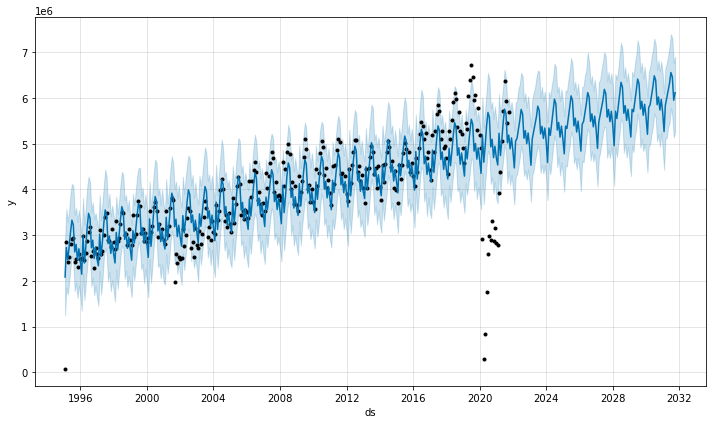

In [52]:
f_forecast = passenger_model.plot(passengers_forecast_df)

Visualize the components.

/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


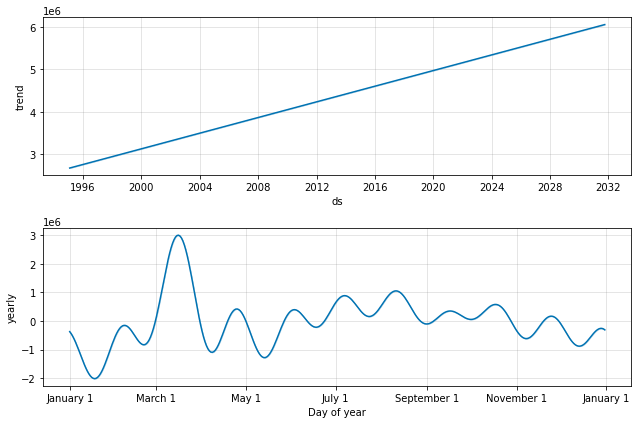

In [53]:
f_components = passenger_model.plot_components(passengers_forecast_df)

Visualizing residuals.

Text(0.5, 1.0, 'Error between observations and Prophet model predictions')

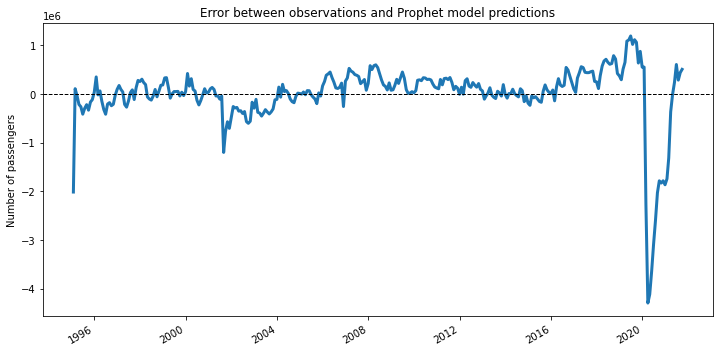

In [54]:
# Calculate the difference between the observed passengers and model predictions
residuals = passengers_prophet_df['y'] - passengers_forecast_df['yhat']

# Use the Timestamps from the future DataFrame as an index
residuals.index = passengers_forecast_df['ds']

# Start the plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
residuals.plot(ax=ax,lw=3)

# Add line at 0
ax.axhline(0,c='k',lw=1,ls='--')

# Label axes
ax.set_xlabel(None)
ax.set_ylabel('Number of passengers')
ax.set_title('Error between observations and Prophet model predictions')

### Forecasting pageviews

In [55]:
# Pull out one column and copy from the parent DataFrame so we can change it
pageviews_prophet_df = pageviews_df['views'].copy()

# Reset index to get the timestamps in index into a column
pageviews_prophet_df = pageviews_prophet_df.reset_index()

# Rename the columns to ds and y
pageviews_prophet_df.columns = ['ds','y']

# Inspect
pageviews_prophet_df.head()

,ds,y
0,2015-07-01,563
1,2015-07-02,486
2,2015-07-03,424
3,2015-07-04,388
4,2015-07-05,407


In [56]:
# Make an empty passenger_model
pageviews_model = Prophet()

# Fit the empty model with the observed data
pageviews_model.fit(pageviews_prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -6.14918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6393.21    0.00181413       260.029           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6400.08   0.000319523       202.153      0.7851      0.7851      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6402.03    0.00588424       284.454      0.1626           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6403.68   0.000769327       205.732      0.4102           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       6404.19   7.65158e-05       136.548    2.83e-07       0.001      560  LS failed, Hessian reset 
     465       6404.57   6.50848e-05    

In [57]:
# Make a DataDrame going a decade into the future
pageviews_future_df = pageviews_model.make_future_dataframe(periods=365*5,freq='D')

# Use the parameters the model learned to forecast into the future
pageviews_forecast_df = pageviews_model.predict(pageviews_future_df)

/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/briankeegan/opt/miniconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


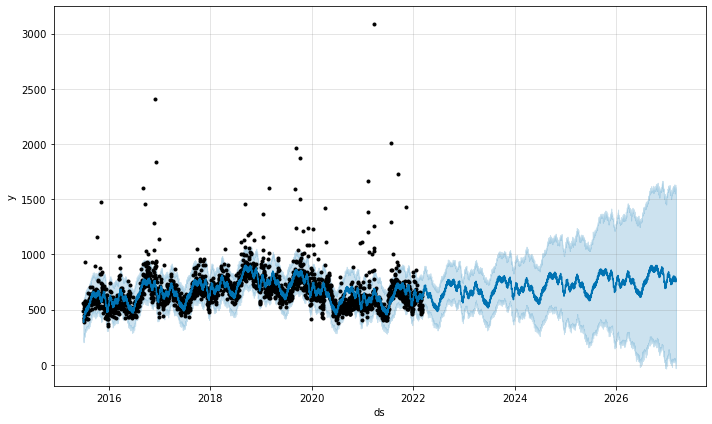

In [58]:
f_forecast = pageviews_model.plot(pageviews_forecast_df)

C:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\Miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


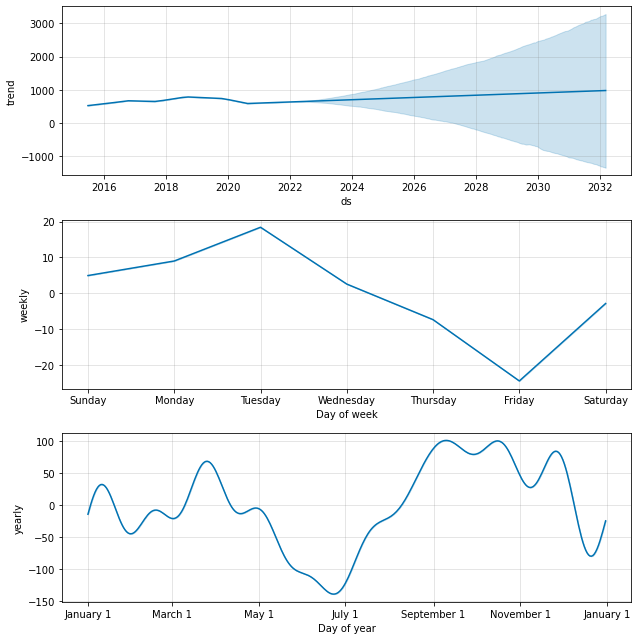

In [201]:
f_components = pageviews_model.plot_components(pageviews_forecast_df)

Text(0.5, 1.0, 'Error between observations and Prophet model predictions')

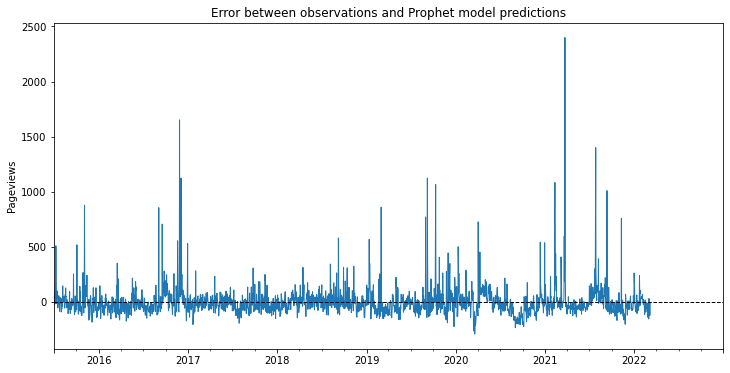

In [59]:
# Calculate the difference between the observed passengers and model predictions
residuals = pageviews_prophet_df['y'] - pageviews_forecast_df['yhat']

# Use the Timestamps from the future DataFrame as an index
residuals.index = pageviews_forecast_df['ds']

# Start the plot
f,ax = plt.subplots(figsize=(12,6))

# Make the plot
residuals.loc[:'2022'].plot(ax=ax,lw=1)

# Add line at 0
ax.axhline(0,c='k',lw=1,ls='--')

# Label axes
ax.set_xlabel(None)
ax.set_ylabel('Pageviews')
ax.set_title('Error between observations and Prophet model predictions')

How are the residuals distributed?

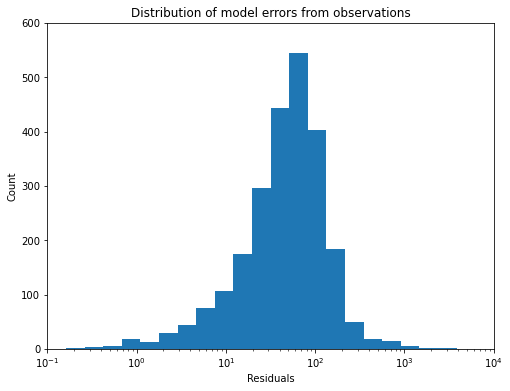

In [60]:
f,ax = plt.subplots(figsize=(8,6))

residuals.abs().hist(bins=np.geomspace(1e-1,1e4,25),ax=ax)
ax.set_xscale('log')
ax.set_xlim((1e-1,1e4))
ax.set_ylim((0,600))
ax.set_xlabel('Residuals')
ax.set_ylabel('Count')
ax.set_title('Distribution of model errors from observations')
ax.grid(None)

(0.0, 4000.0)

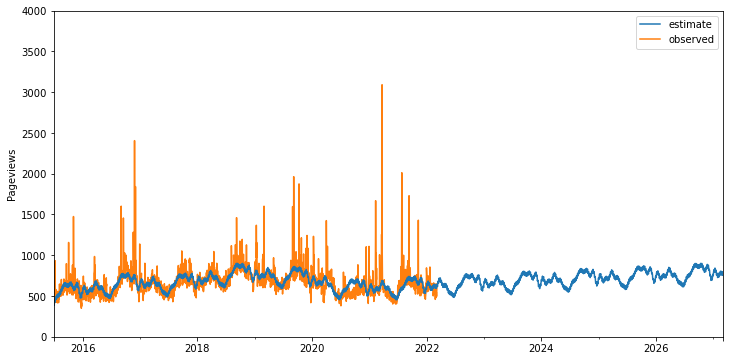

In [61]:
f,ax = plt.subplots(figsize=(12,6))

pageviews_forecast_df.plot(
    x='ds',
    y='yhat',
    ax=ax,
    label='estimate',
    color='tab:blue'
)

pageviews_prophet_df.plot(
    x='ds',
    y='y',
    ax=ax,
    zorder=0,
    label='observed',
    color='tab:orange'
)

ax.set_ylabel('Pageviews')
ax.set_xlabel(None)
ax.set_ylim((0,4000))

## Exercises

Use `sm.tsa.seasonal_decompose` from statsmodels to visualize the trend, seasonal, and residual components of `temp_df`.

Create a Prophet DataFrame with the `temp_df` that contains only a "ds" and a "y" column.

Start and fit the Prophet model using the "prophet-ized" DataFrame above.

Make the future DataFrame and use the model to make the forecast.

Plot the forecast.

Plot the residuals over time.

Visualize the distribution of the residuals.

## Appendix

### Berkeley Earth Surface Temperature

Read the "Daily Land" average temperature data from [BEST](http://berkeleyearth.org/data/).

In [24]:
# Read daily temps from source
raw_best_df = pd.read_csv(
    'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt',
    header=None,
    sep='\s+',
    skiprows=23,
    low_memory=False
)

# Rename columns
raw_best_df.columns = ['Date Number','Year','Month','Day','Day of Year','Anomaly']

# Construct date
raw_best_df['Date'] = pd.to_datetime(raw_best_df[['Year','Month','Day']])

# Anomaly from 1951-1980 average of 8.59
raw_best_df['AvgTemp'] = raw_best_df['Anomaly'] + 8.59

# Extract the series
avg_temp_s = raw_best_df.set_index('Date')['AvgTemp']
avg_temp_s.to_csv('avg_temp_1880_2021.csv')

# Inspect
avg_temp_s.head()

Date
1880-01-01    8.056
1880-01-02    9.431
1880-01-03    8.956
1880-01-04    9.870
1880-01-05    9.213
Name: AvgTemp, dtype: float64

### NYC cab rides

New York City's Taxi and Limousine Commission publishes [high-resolution anonymized data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) about the pick-up and drop-off location for every trip (including licensed rideshare services) starting or ending in the city's boundaries.

In [36]:
yellow_raw_df = pd.read_csv(
    'yellow_tripdata_2020-03.csv',
    parse_dates = ['tpep_pickup_datetime','tpep_dropoff_datetime']
)

fhv_raw_df = pd.read_csv(
    'fhv_tripdata_2020-03.csv',
    parse_dates=['pickup_datetime','dropoff_datetime']
)

nyc_pickups_df = pd.DataFrame({
    'yellowcab':yellow_raw_df.groupby(pd.Grouper(key='tpep_pickup_datetime',freq='min')).apply(len),
    'rideshare':fhv_raw_df.groupby(pd.Grouper(key='pickup_datetime',freq='min')).apply(len)
})

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_35624/2034204351.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellow_raw_df = pd.read_csv('yellow_tripdata_2020-03.csv',parse_dates = ['tpep_pickup_datetime','tpep_dropoff_datetime'])


In [39]:
nyc_pickups_clean_df = nyc_pickups_df.loc[pd.date_range('2020-03-01','2020-03-31',freq='min')]
nyc_pickups_clean_df.index.name = 'timestamp'

nyc_pickups_clean_df.to_csv('nyc_pickups.csv')

### Wikipedia pageview data
Get the pageviews for the University of Colorado Boulder's [Wikipedia article](https://en.wikipedia.org/wiki/University_of_Colorado_Boulder).

In [70]:
from wikifunctions import get_pageviews

In [71]:
ucb_pvs = get_pageviews('University of Colorado Boulder')
ucb_pvs.to_csv('pageviews_ucb.csv')